In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
from sklearn.model_selection import cross_val_score

In [2]:
toys1 = pd.read_json('Toys_and_Games_5.json', lines=True)
toys = toys1.loc[np.random.choice(toys1.index, 50000, replace=False)].reindex()

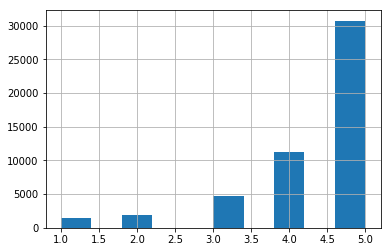

In [3]:
toys['overall'].hist()

In [4]:
toys['positive_rating'] = np.where(toys.overall >=4, 1, 0)

In [5]:
toys

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,positive_rating
125897,B007WYU7R8,"[4, 31]",1,"As a teenager back in the 90's, I was a huge f...","09 17, 2012",A3CPJYAQMCUGNR,Chris Matthews,No flash,1347840000,0
33412,B000GL1DTA,"[17, 18]",1,My kids have had this for over 6 months and ha...,"05 25, 2010",A38D4KWDYXYWSN,momwith2kids,Cute...that's about it.,1274745600,0
54346,B001EHZQGG,"[0, 0]",5,My boys love Webkins and both asked for this o...,"11 5, 2008",A1KRVDL5NX0989,B.A.O.,Another Webkin,1225843200,1
136770,B0091STZPS,"[0, 0]",5,I have the horror movie collection set and I w...,"03 21, 2013",A14W2GKUFFHM9U,Kristian Hargett,Love all of the Funkos,1363824000,1
113382,B006E1B7ME,"[0, 0]",4,It is an inexpensive nerf gun. . .I have littl...,"06 20, 2013",A3DBN33WWFIL60,MRCPA,nerf gun,1371686400,1
104474,B0052D3098,"[0, 0]",4,Paid a little more then I would have if I had ...,"12 10, 2013",AEI8CWKQZ4PG9,"Paige ""Paige In A Book""",A bit over priced but couldn't find it in stores.,1386633600,1
165517,B00FMA36BS,"[20, 21]",5,She's pure purrfection! I love this version of...,"11 12, 2013",A3AXAT4SKPS9AF,Megan Remus,Catrine DeWow,1384214400,1
59334,B001U5N786,"[0, 0]",4,The only thing I wish we could change is that ...,"01 10, 2013",A2ERQMCFYJG4RI,"Allyssa M. Rosenau ""Ellen's Mommy""",Great storage for the Tag Jr System!,1357776000,1
41624,B000PNIOBE,"[0, 0]",5,Very cool gadget to play around with. The int...,"03 22, 2013",A7VFDN1XKTF2G,jhoscout,Cool gadget,1363910400,1
23366,B0007WX1HK,"[0, 4]",3,I think the Bratz one is more detailed and rea...,"08 31, 2005",ATAOOPNXGJYXW,"Dolly girl ""Dollie luva""","I like it, but",1125446400,0


In [6]:
#df = toys[['reviewText', 'positive_rating']]

In [7]:
toys['positive_rating'] = (toys['positive_rating'] == 1)

In [8]:
toys['reviewText'] = toys.reviewText.str.replace(r'[^a-zA-Z\d\s:]', '')
toys['reviewText'] = toys['reviewText'].str.lower()

pos_words = toys.reviewText[toys.overall].str.cat(sep=' ').split()

neg_words = toys.reviewText[toys.overall == False].str.cat(sep=' ').split()

/opt/conda/envs/fastai/lib/python3.6/site-packages/pandas/core/series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [9]:
# Unique Words
print('negative:', len(np.unique(neg_words)), ' positive:', len(np.unique(pos_words)))

negative: 0  positive: 23


In [10]:
keywords = pd.Series(neg_words).value_counts().keys().ravel()

keywords

array([], dtype=float64)

In [11]:
diff = np.setdiff1d(
        ar1=pd.Series(pos_words).value_counts().keys().ravel(), 
                      ar2=pd.Series(neg_words).value_counts().keys().ravel()
                     )
diff

array(['a', 'ago', 'and', 'bought', 'daughter', 'few', 'for', 'holidays',
       'it', 'loved', 'loves', 'my', 'niece', 'one', 'our', 'she',
       'still', 'the', 'today', 'too', 'using', 'we', 'years'],
      dtype=object)

In [12]:
new = toys
keywords = diff

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    new[str(key)] = new.reviewText.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

X = new[keywords]
y = new['positive_rating']

In [13]:
time1 = time.time()

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X, y)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(X)

In [14]:
cross_val_score(bnb, X, y, cv=5)

array([0.83491651, 0.83711629, 0.8382    , 0.83538354, 0.8369837 ])

In [15]:
print('Naive Bayes runtime')
print('--- %s seconds ---' % (time.time() - time1))

Naive Bayes runtime
--- 0.21200084686279297 seconds ---


In [16]:
time2 = time.time()

from sklearn.svm import SVC
svc = SVC()

X = new[keywords]
y = new['positive_rating']

svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
cross_val_score(svc, X, y, cv=5)

array([0.83861614, 0.83861614, 0.8387    , 0.83868387, 0.83868387])

In [18]:
print('SVM runtime')
print('--- %s seconds ---' % (time.time() - time2))

SVM runtime
--- 516.9128775596619 seconds ---
